# Heavy identifiers and heavy observers

### RQs
- With regards to the type of contribution (observation vs identification), what types of users are there? Are there users that are rather heavy observers or heavy identifiers or is the proportion of their contributions balanced?
- Are there users that participated as identifiers or observers in several/all cities and/or years?

In [1]:
import pandas as pd

# load data
df_ln_18 = pd.read_csv('Data/CNC_London_2018.csv')
df_ln_19 = pd.read_csv('Data/CNC_London_2019.csv')
df_ln_20 = pd.read_csv('Data/CNC_London_2020.csv')
df_la_17 = pd.read_csv('Data/CNC_Los_Angeles_2017.csv')
df_la_18 = pd.read_csv('Data/CNC_Los_Angeles_2018.csv')
df_la_19 = pd.read_csv('Data/CNC_Los_Angeles_2019.csv')
df_la_20 = pd.read_csv('Data/CNC_Los_Angeles_2020.csv')
df_sf_17 = pd.read_csv('Data/CNC_San_Francisco_2017.csv')
df_sf_18 = pd.read_csv('Data/CNC_San_Francisco_2018.csv')
df_sf_19 = pd.read_csv('Data/CNC_San_Francisco_2019.csv')
df_sf_20 = pd.read_csv('Data/CNC_San_Francisco_2020.csv')
df_list = [df_ln_18, df_ln_19, df_ln_20, df_la_17, df_la_18, df_la_19, df_la_20, df_sf_17, df_sf_18, df_sf_19, df_sf_20]

# print names of all columns
print(df_ln_18.columns)

# print number of rows and columns
for df in df_list:
    name =[x for x in globals() if globals()[x] is df][0]
    print("Dataframe Name: %s" % name)
    print(df.shape)

Index(['id', 'observed_on_string', 'time_observed_at', 'created_time_zone',
       'created_at', 'updated_at', 'description', 'user_id', 'user_login',
       'quality_grade', 'reviewed_by', 'faves_count',
       'num_identification_agreements', 'num_identification_disagreements',
       'identifications_most_agree', 'identifications_most_disagree',
       'captive', 'place_guess', 'place_ids', 'longitude', 'latitude',
       'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy', 'obscured',
       'species_guess', 'taxon_id', 'taxon_name', 'preferred_common_name',
       'iconic_taxon_name', 'taxon_rank', 'taxon_parent_id', 'taxon_native',
       'taxon_endemic', 'taxon_threatened', 'taxon_search_rank',
       'taxon_observations', 'identifications'],
      dtype='object')
Dataframe Name: df_ln_18
(2624, 38)
Dataframe Name: df_ln_19
(5349, 38)
Dataframe Name: df_ln_20
(5802, 38)
Dataframe Name: df_la_17
(18169, 38)
Dataframe Name: df_la_18
(19421, 38)
Dataframe Name: df_la_19
(34540,

## Heavy observers
Calculate observer summary table
- How many observations per user (who participated as an observer in one+ of the CNCs)...
    - per challenge
        - **File:** observer_count_single_challenge.csv
    - in total ?
        - **File:** observer_count_combined.csv
- How many CNS did each observer participate in?
    - **File:** observer_count_combined.csv

In [11]:
# print count of unique users and count all observations they made
# append results of all years to one dataframe
list_obs_count = []
df_all_obs = pd.DataFrame()

for idx, df in enumerate(df_list):
    name =[x for x in globals() if globals()[x] is df][0]
    print("Dataframe Name: %s" % name)
    no_users = df["user_id"].nunique()
    print("No of users who uploaded observations: %s" % no_users)
    df_obs_count = df.groupby("user_id")["id"].nunique().sort_values(ascending=False).reset_index(name='obs_count')
    
    # add city and year as new columns
    if idx < 3:
        df_obs_count['city'] = 'London'
    elif 2 < idx < 7:
        df_obs_count['city'] = 'Los Angeles'
    else:
        df_obs_count['city'] = 'San Francisco'
    if idx in [3,7]:
        df_obs_count['year'] = 2017
    elif idx in [0,4,8]:
        df_obs_count['year'] = 2018
    elif idx in [1,5,9]: 
        df_obs_count['year'] = 2019
    else:
        df_obs_count['year'] = 2020
    
    df_obs_count.rename(columns={'user_id': 'observer'}, inplace=True)
    list_obs_count.append(df_obs_count)
    df_all_obs = df_all_obs.append(df_obs_count)
    
print(list_obs_count)
print(df_all_obs.shape)

Dataframe Name: df_ln_18
No of users who uploaded observations: 109
Dataframe Name: df_ln_19
No of users who uploaded observations: 284
Dataframe Name: df_ln_20
No of users who uploaded observations: 571
Dataframe Name: df_la_17
No of users who uploaded observations: 892
Dataframe Name: df_la_18
No of users who uploaded observations: 899
Dataframe Name: df_la_19
No of users who uploaded observations: 1608
Dataframe Name: df_la_20
No of users who uploaded observations: 1679
Dataframe Name: df_sf_17
No of users who uploaded observations: 779
Dataframe Name: df_sf_18
No of users who uploaded observations: 1753
Dataframe Name: df_sf_19
No of users who uploaded observations: 2149
Dataframe Name: df_sf_20
No of users who uploaded observations: 2702
[     observer  obs_count    city  year
0      353381        567  London  2018
1      664459        150  London  2018
2      911337        125  London  2018
3      883351         97  London  2018
4      781146         95  London  2018
..        ..

In [12]:
df_all_obs.to_csv('observer_count_single_challenges.csv', index=False)

In [13]:
# sum up all observations from all challenges for each unique user and count number of challenges they participated in
df_obs_combined = pd.DataFrame()
df_obs_combined = df_all_obs.groupby('observer')['obs_count'].agg(['sum','count'], as_index=False)
df_obs_combined = df_obs_combined.sort_values(by=['sum'], ascending = False)
print(df_obs_combined)

           sum  count
observer             
34687     3572      4
223005    2694      4
12809     2603      2
2991      2576      4
17796     2192      4
...        ...    ...
551378       1      1
1676012      1      1
551854       1      1
552831       1      1
453347       1      1

[11289 rows x 2 columns]


In [14]:
df_obs_combined.to_csv('observer_count_combined.csv')

## Heavy identifiers
Create identifier summary table
- How many identifications per user (who participated as an identifier in one+ of the CNCs)...
    - per challenge 
        - **File:** identifier_count_single_challenge.csv
    - in total ? 
        - **File:** identifier_count_combined.csv
- How many CNS did each identifier participate in? 
    - **File:** identifier_count_combined.csv


In [15]:
# extract all list items (single identifications) from 'identifications'-column
import numpy as np

for idx, df in enumerate(df_list):
    print(idx)
    df_ident = pd.DataFrame()
    
    for _, row in df.iterrows():
        idents = row['identifications']
        if pd.isnull(idents) == False:
            df_temp = pd.DataFrame(eval(idents))
            df_temp['observer'] = np.repeat(row['user_id'], df_temp.shape[0])
            df_ident = df_ident.append(df_temp)
            
    df_ident.rename(columns={'user_id': 'identifier'}, inplace=True)
    print(df_ident.shape)
    df_list[idx] = df_ident
    
for df in df_list:
    print(df.shape)
    print(df.head())

0
(5797, 4)
1
(13179, 4)
2
(12584, 4)
3
(44965, 4)
4
(42541, 4)
5
(72890, 4)
6
(39803, 4)
7
(60523, 4)
8
(97193, 4)
9
(84716, 4)
10
(62841, 4)
(5797, 4)
   identifier    category disagreement  observer
0      353381   improving         None    159021
1      743476  supporting        False    159021
2      664459  supporting        False    159021
3         160  supporting        False    159021
0       29729  supporting        False    664459
(13179, 4)
   identifier    category disagreement  observer
0     1595601   improving        False   1595601
1     1554588  supporting        False   1595601
0     1595601     leading        False   1595601
0     1595601   improving        False   1595601
1      894051  supporting        False   1595601
(12584, 4)
   identifier    category disagreement  observer
0     2295352   improving        False   2295352
1     2782355     leading        False   2295352
2     1488476  supporting        False   2295352
0     2295352   improving        False   

In [17]:
# count unique users who identified observations and sum up their contributions per challenge
# add all to one dataframe
ident_list = []
df_all_ident = pd.DataFrame()

for idx, df in enumerate(df_list):
    no_users = df['identifier'].nunique()
    print("No of users who uploaded identifications: %s" % no_users)
    df_ident_count = df.groupby("identifier")["observer"].nunique().sort_values(ascending=False).reset_index(name='ident_count')
    
    # add columns for city and year
    if idx < 3:
        df_ident_count['city'] = 'London'
    elif 2 < idx < 7:
        df_ident_count['city'] = 'Los Angeles'
    else:
        df_ident_count['city'] = 'San Francisco'
    if idx in [3,7]:
        df_ident_count['year'] = 2017
    elif idx in [0,4,8]:
        df_ident_count['year'] = 2018
    elif idx in [1,5,9]: 
        df_ident_count['year'] = 2019
    else:
        df_ident_count['year'] = 2020
        
    df_all_ident = df_all_ident.append(df_ident_count)    
    ident_list.append(df_ident_count)
    
print(df_all_ident.shape)
print(ident_list)

No of users who uploaded identifications: 398
No of users who uploaded identifications: 666
No of users who uploaded identifications: 909
No of users who uploaded identifications: 1676
No of users who uploaded identifications: 1743
No of users who uploaded identifications: 2421
No of users who uploaded identifications: 2346
No of users who uploaded identifications: 1533
No of users who uploaded identifications: 2674
No of users who uploaded identifications: 2982
No of users who uploaded identifications: 3449
(20797, 4)
[     identifier  ident_count    city  year
0           160           59  London  2018
1        147030           54  London  2018
2        677256           31  London  2018
3         29729           30  London  2018
4        894051           29  London  2018
..          ...          ...     ...   ...
393      911520            1  London  2018
394      911995            1  London  2018
395      912217            1  London  2018
396      913787            1  London  2018
3

In [18]:
df_all_ident.to_csv('identifier_count_single_challenges.csv', index=False)

In [19]:
# sum up all identifications from all challenges for each unique user and count number of challenges they participated in
df_ident_combined = pd.DataFrame()
df_ident_combined = df_all_ident.groupby('identifier')['ident_count'].agg(['sum','count'], as_index=False)
df_ident_combined = df_ident_combined.sort_values(by=['sum'], ascending = False)
print(df_ident_combined)

             sum  count
identifier             
17695       2811      9
179103      2711      8
425620      1506      4
1           1282     10
510442      1202     11
...          ...    ...
1212881        1      1
1212786        1      1
1211702        1      1
1211623        1      1
977058         1      1

[13189 rows x 2 columns]


In [20]:
df_ident_combined.to_csv('identifier_count_combined.csv')

## Observation vs Identification
Combination of the summary statistics

**RQ examples**
- Are there users who participated in all challenges (as observer or identifier)?
- Are there users who took part in all challenges as identifier but never uploaded an observation? Or the other way round?
- Are there users who are both heavy identifiers and heavy observers?

**File:** ident_obs_combined.csv

In [35]:
# merge the observation and identification summary dataframes
df_join = df_obs_combined.join(
    df_ident_combined, 
    how='outer', 
    lsuffix="_obser",
    rsuffix="_ident"
).astype(object)
df_join.index.name = 'user_id'

print(df_join)
df_join.to_csv('ident_obs_combined.csv')

             sum  count
identifier             
17695       2811      9
179103      2711      8
425620      1506      4
1           1282     10
510442      1202     11
...          ...    ...
1212881        1      1
1212786        1      1
1211702        1      1
1211623        1      1
977058         1      1

[13189 rows x 2 columns]
           sum  count
observer             
34687     3572      4
223005    2694      4
12809     2603      2
2991      2576      4
17796     2192      4
...        ...    ...
551378       1      1
1676012      1      1
551854       1      1
552831       1      1
453347       1      1

[11289 rows x 2 columns]
        sum_obser count_obser sum_ident count_ident
user_id                                            
1             792           4      1282          10
5               7           1         1           1
17             29           1         4           2
28            896           3       822          10
36            NaN         NaN         

## First Results:

### Heavy identifiers:
- There are 25 users who provided identifications in all 11 challenges
    - only one of them also provided observations (26 in 1 challenge)
    - these users provided between 84 and 1202 identifications in total

### Heavy observers
- There is one user (21786) who provided observations in 6 challenges (a total of 20150)
    - he/she also provided identifications (143) in 6 challenges
- There are 149 users who provided observations in 4 challenges
    - all of which provided also identifications in 3 - 10 challenges
- User 34687 provided the most observations in total (3572 in 4 challenges)

## Further steps:
- Summary statistics for observers and identifiers
- visualisations
- test dynamics for different cities

## Histograms

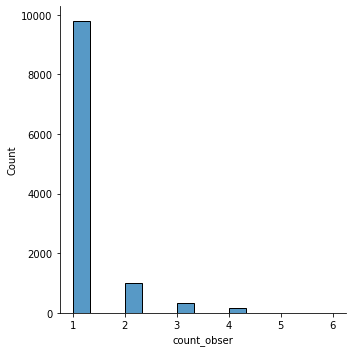

In [44]:
# Histograms
import seaborn as sns
from matplotlib import pyplot as plt

# Observation CNC count
sns.displot(df_join, x="count_obser")


<AxesSubplot:xlabel='sum_obser', ylabel='Count'>

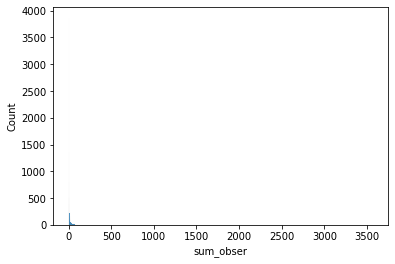

In [45]:
# Sum of all observations in all CNS combined
sns.histplot(df_join, x="sum_obser")

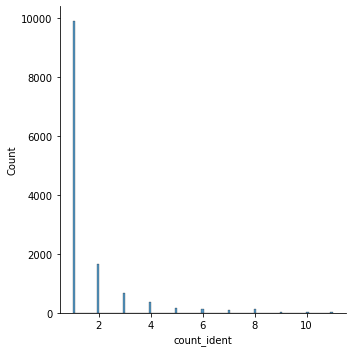

In [46]:
# Identification CNC count
sns.displot(df_join, x="count_ident")

<AxesSubplot:xlabel='sum_ident', ylabel='Count'>

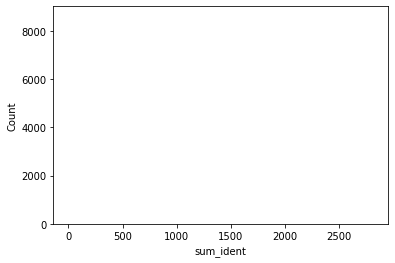

In [47]:
# Sum of all identifications in all CNS combined
sns.histplot(df_join, x="sum_ident")